###### Loading packages

In [12]:
library(tseries)
library(moments)
library(stargazer)
library(tidyverse)
library(ggpubr)
library(rstatix)

###### Getting data

In [19]:
dataset1 <- read.csv(file.choose())
dataset2 <- read.csv(file.choose())
dataset3 <- read.csv(file.choose())

### Descriptive analysis

The descriptive analysis allows to study the data dispersion with indicators like skewness and curtosis and with graphs like boxplots and histograms.

A normal distribution is characterized by a skewness of 0 and a kurtosis of 3. If the distribution of the variable flexion has values near those, it may indicate that the variable is normally distributed.

Declaring variable :

In [20]:
flexion <- dataset1$Flexion.en.degré

Table below shows

- we have 15 observations
- Median and mean are roughly equal which is the case for normal distribution 
- The kurtosis is near 3 and the skewness is near 0.

Those statitics indicate that it is possible to consider a normal distribution for the variable flexion.

In [21]:
stargazer(subset(dataset1, select = c(Flexion.en.degré)), type = 'text', title = "Summary statistics on flexion", median = TRUE)

print("kurtosis")
kurtosis(flexion) 

print("skewness")
skewness(flexion) 


Summary statistics on flexion
Statistic        N   Mean  St. Dev. Min Pctl(25) Median Pctl(75) Max
--------------------------------------------------------------------
Flexion.en.degré 15 58.933  4.183   53     56      59     61.5   68 
--------------------------------------------------------------------
[1] "kurtosis"


[1] 2.720564

[1] "skewness"


[1] 0.5395203

###### Boxplot

From both plots we notice a very slight right-skewed distribution. The data are not scattered.
The histogram of the variable flexion looks like of a normal distributed variable. 


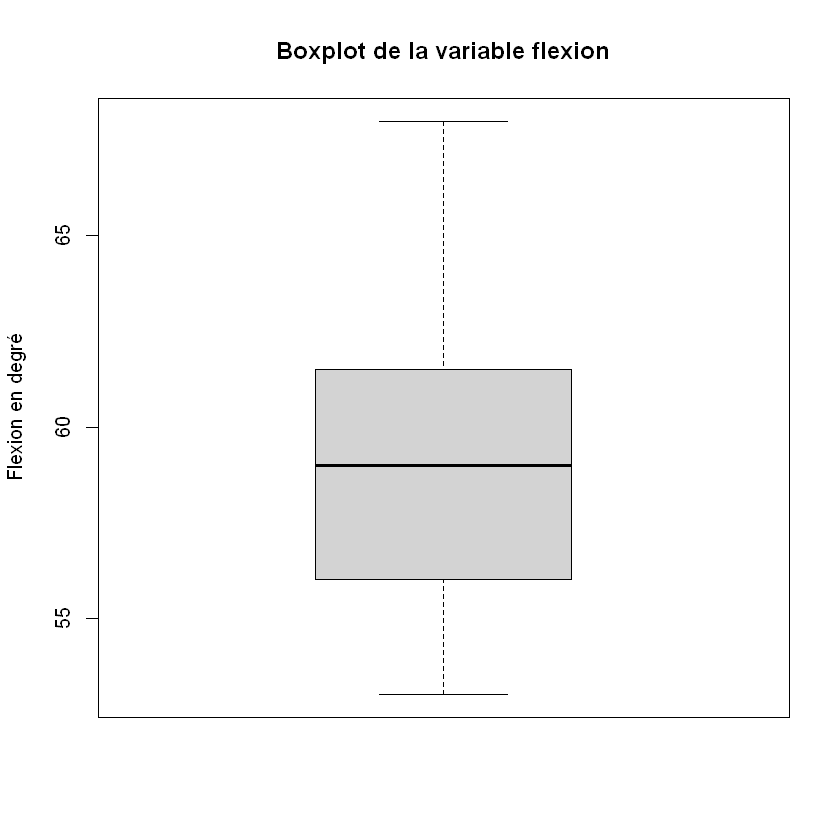

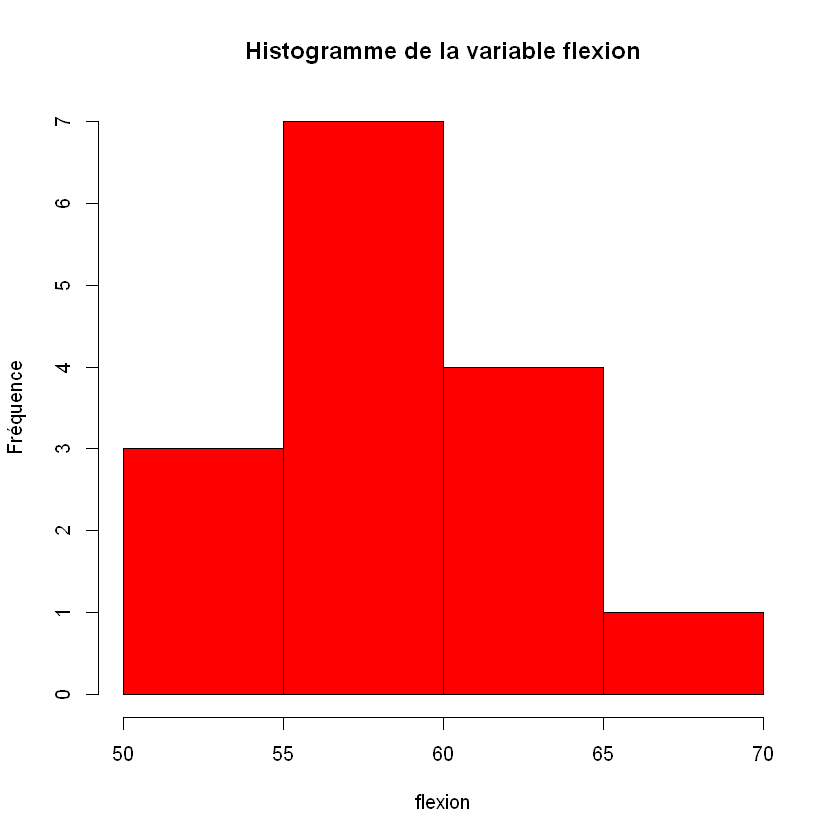

In [5]:
boxplot(flexion, main = "Boxplot de la variable flexion", ylab = "Flexion en degré") 
hist(flexion,col="red", main = 
       "Histogramme de la variable flexion", ylab = "Fréquence") 

To confirm the graphic analysis, the shapiro-wilk test is computed to check for normality distribution.
Here the p-value is greater than 0.05 (=alpha) which means the null-hypothesis (normally distributed variable) cannot be rejected. This supports our graphical analysis and we establish that the variable flexion is normally distributed.

In [10]:
shapiro.test(flexion)


	Shapiro-Wilk normality test

data:  flexion
W = 0.95483, p-value = 0.6034


####  Comparing flexion measures at t1, t2 and t3


In [43]:
#Creating new database with the variable flexion at three different times. 
#t1 before cupping, t2 after cupping, t3 one day after

t1 <- dataset1$Flexion.en.degré
t2 <- dataset2$Flexion.en.degré
t3 <- dataset3$Flexion.en.degré
id <- c(1:15)
a <- data.frame(id,t1, t2, t3)

In [39]:
a

id,t1,t2,t3
<int>,<int>,<int>,<int>
1,62,65,53
2,58,62,54
3,61,64,56
4,56,58,53
5,59,64,58
6,53,58,52
7,68,56,56
8,54,68,58
9,62,56,59


In [44]:
# Pivoting table

a <- a %>%
  gather(key = "time", value = "flexion", t1,t2,t3) %>%
  convert_as_factor(id, time)
head(a, 20)


,id,time,flexion
,<fct>,<fct>,<int>
1,1,t1,62
2,2,t1,58
3,3,t1,61
4,4,t1,56
5,5,t1,59
6,6,t1,53
7,7,t1,68
8,8,t1,54
9,9,t1,62


The summary statistics below show that the standard deviation from the 3 different time are close  and that the mean at t2 is far from t3.

In [45]:
a %>%
  group_by(time) %>%
  get_summary_stats(flexion, type = "mean_sd")

time,variable,n,mean,sd
<fct>,<chr>,<dbl>,<dbl>,<dbl>
t1,flexion,15,58.933,4.183
t2,flexion,15,61.933,5.391
t3,flexion,15,56.267,3.283


The plots of the three groups (t1, t2 and t3) allow to compare median. Here, we see that median of t1 and t2 are close but median of t2 is far from t3.
Just after the cupping therapy, patients tend to have higher cervical flexion ability. But the day after, flexion ability decreases under flexion before cupping therapy.

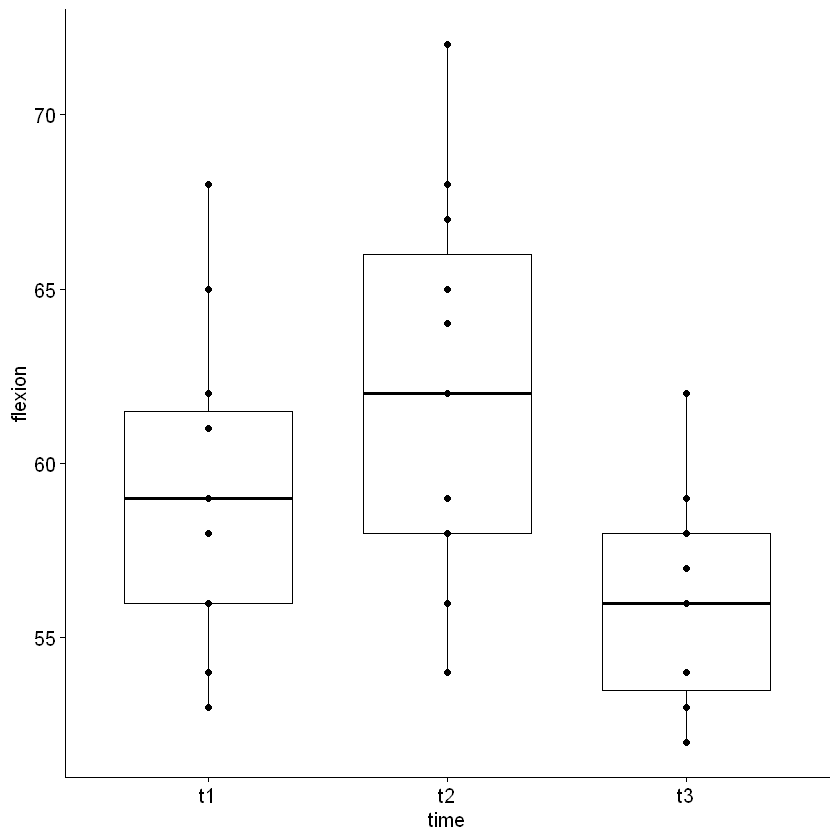

In [46]:
ggboxplot(a, x = "time", y = "flexion", add = "point")

Before computing the anova, we check the assumptions. 
First, we look for any outlier in the set. Here we see no outlier. So, it is alright. 

In [34]:
a %>%
  group_by(time) %>%
  identify_outliers(flexion)

time,id,flexion,is.outlier,is.extreme
<fct>,<fct>,<int>,<lgl>,<lgl>


Then, we check for normality of the three different groups/variables (t1, t2, t3) with shapiro wilk. As the p-values, are bigger than 0.05 we do not reject the null hypothesis of normally distributed variables. We conclude that our variabes t1, t2 and t3 are normally distributed.

In [35]:
a %>%
  group_by(time) %>%
  shapiro_test(flexion)

time,variable,statistic,p
<fct>,<chr>,<dbl>,<dbl>
t1,flexion,0.9548250,0.6033512
t2,flexion,0.9453493,0.4543922
t3,flexion,0.9272465,0.2481127


We compute anova and as the p-value is lower than 0.05 we reject the null hypothesis. It means that there is a statistical significative difference between t1, t2, t3. 
Cupping therapy has an effect on patients.

In [36]:
res.aov <- anova_test(data = a, dv = flexion, wid = id, within = time)
get_anova_table(res.aov)

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,time,2,28,6.105,0.006,*,0.231


To investigate where the difference comes from, we do pairwise test and we observe that the significative difference is between t2 and t3.

In [37]:
pwc <- a %>%
  pairwise_t_test(
    flexion ~ time, paired = TRUE,
    p.adjust.method = "bonferroni"
  )
pwc

,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,flexion,t1,t2,15,15,-1.792843,14,0.095,0.284,ns
2,flexion,t1,t3,15,15,1.818987,14,0.090,0.271,ns
3,flexion,t2,t3,15,15,3.299705,14,0.005,0.016,*


> <mark>At this moment, it can not be concluded that cupping therapy improves flexion ability of patients. More investigation is needed.</mark>